In [293]:
import pandas as pd
import toolbox_ML as tools_ML
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [251]:
df_titanic = pd.read_csv("./data/titanic.csv")


df_practica_rl = pd.read_csv("./data/practica_regresion_lineal.csv", sep="|")

df_wines = pd.read_csv("./data/wines_dataset.csv", sep="|")

In [252]:
df_titanic_sin_NaN = df_titanic.dropna()

In [253]:
#en el df del titanic asignamos las variables que son categóricas como categóricas para que la funcion las pueda reconocer como tal
df_titanic_sin_NaN["survived"] = df_titanic_sin_NaN["survived"].astype('category')
df_titanic_sin_NaN["alive"] = df_titanic_sin_NaN["alive"].astype('category')
df_titanic_sin_NaN["alone"] = df_titanic_sin_NaN["alone"].astype('category')
df_titanic_sin_NaN["who"] = df_titanic_sin_NaN["who"].astype('category')
df_titanic_sin_NaN["adult_male"] = df_titanic_sin_NaN["adult_male"].astype('category')

# TOOLBOX_I

# Función describe_df


In [254]:
tools_ML.describe_df(df_titanic)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
Tipos,int64,int64,object,float64,int64,int64,float64,object,object,object,bool,object,object,object,bool
% Faltante,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.22,0.0,0.0,0.0,77.22,0.22,0.0,0.0
Valores Únicos,2,3,2,88,7,7,248,3,3,3,2,7,3,2,2
% Cardinalidad,0.22,0.34,0.22,9.88,0.79,0.79,27.83,0.34,0.34,0.34,0.22,0.79,0.34,0.22,0.22


# Función tipifica_variables

In [255]:
tools_ML.tipifica_variables(df=df_titanic_sin_NaN, umbral_categoria=10, umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,survived,category,2,1.10,Binaria
1,pclass,int64,3,1.65,Categórica
2,sex,object,2,1.10,Binaria
3,age,float64,63,34.62,Numérica continua
4,sibsp,int64,4,2.20,Categórica
5,parch,int64,4,2.20,Categórica
6,fare,float64,93,51.10,Numérica continua
7,embarked,object,3,1.65,Categórica
8,class,object,3,1.65,Categórica
9,who,category,3,1.65,Categórica


# Función get_features_num_regression

In [256]:
features_numericas = tools_ML.get_features_num_regression(df=df_titanic_sin_NaN, target_col="fare", umbral_corr=0.2, pvalue=0.0001)
print(features_numericas)

['pclass', 'sibsp', 'parch']


# Función plot_features_num_regression

['RM', 'LSTAT']


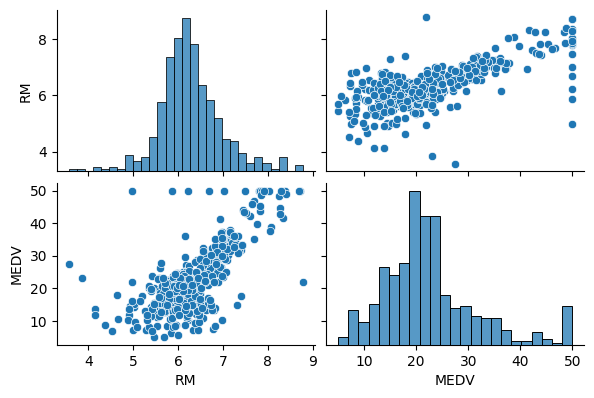

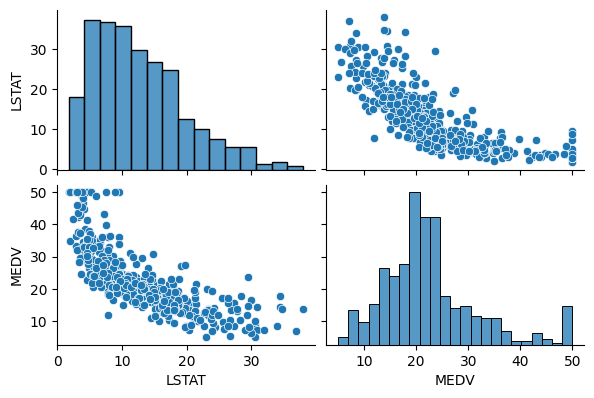

In [257]:
features_numericas = tools_ML.plot_features_num_regression(df=df_practica_rl, target_col="MEDV", lista_columnas="", umbral_corr=0.6, umbral_pvalue=0.05, limite_pairplot=2)
print(features_numericas)

# Función get_features_cat_regression

In [258]:
features_categoricas = tools_ML.get_features_cat_regression(df=df_titanic_sin_NaN, target_col="fare", umbral_pvalue=0.0005)
print(features_categoricas)

['class', 'deck']


# Función plot_features_cat_regression

['embarked', 'class', 'deck', 'embark_town']


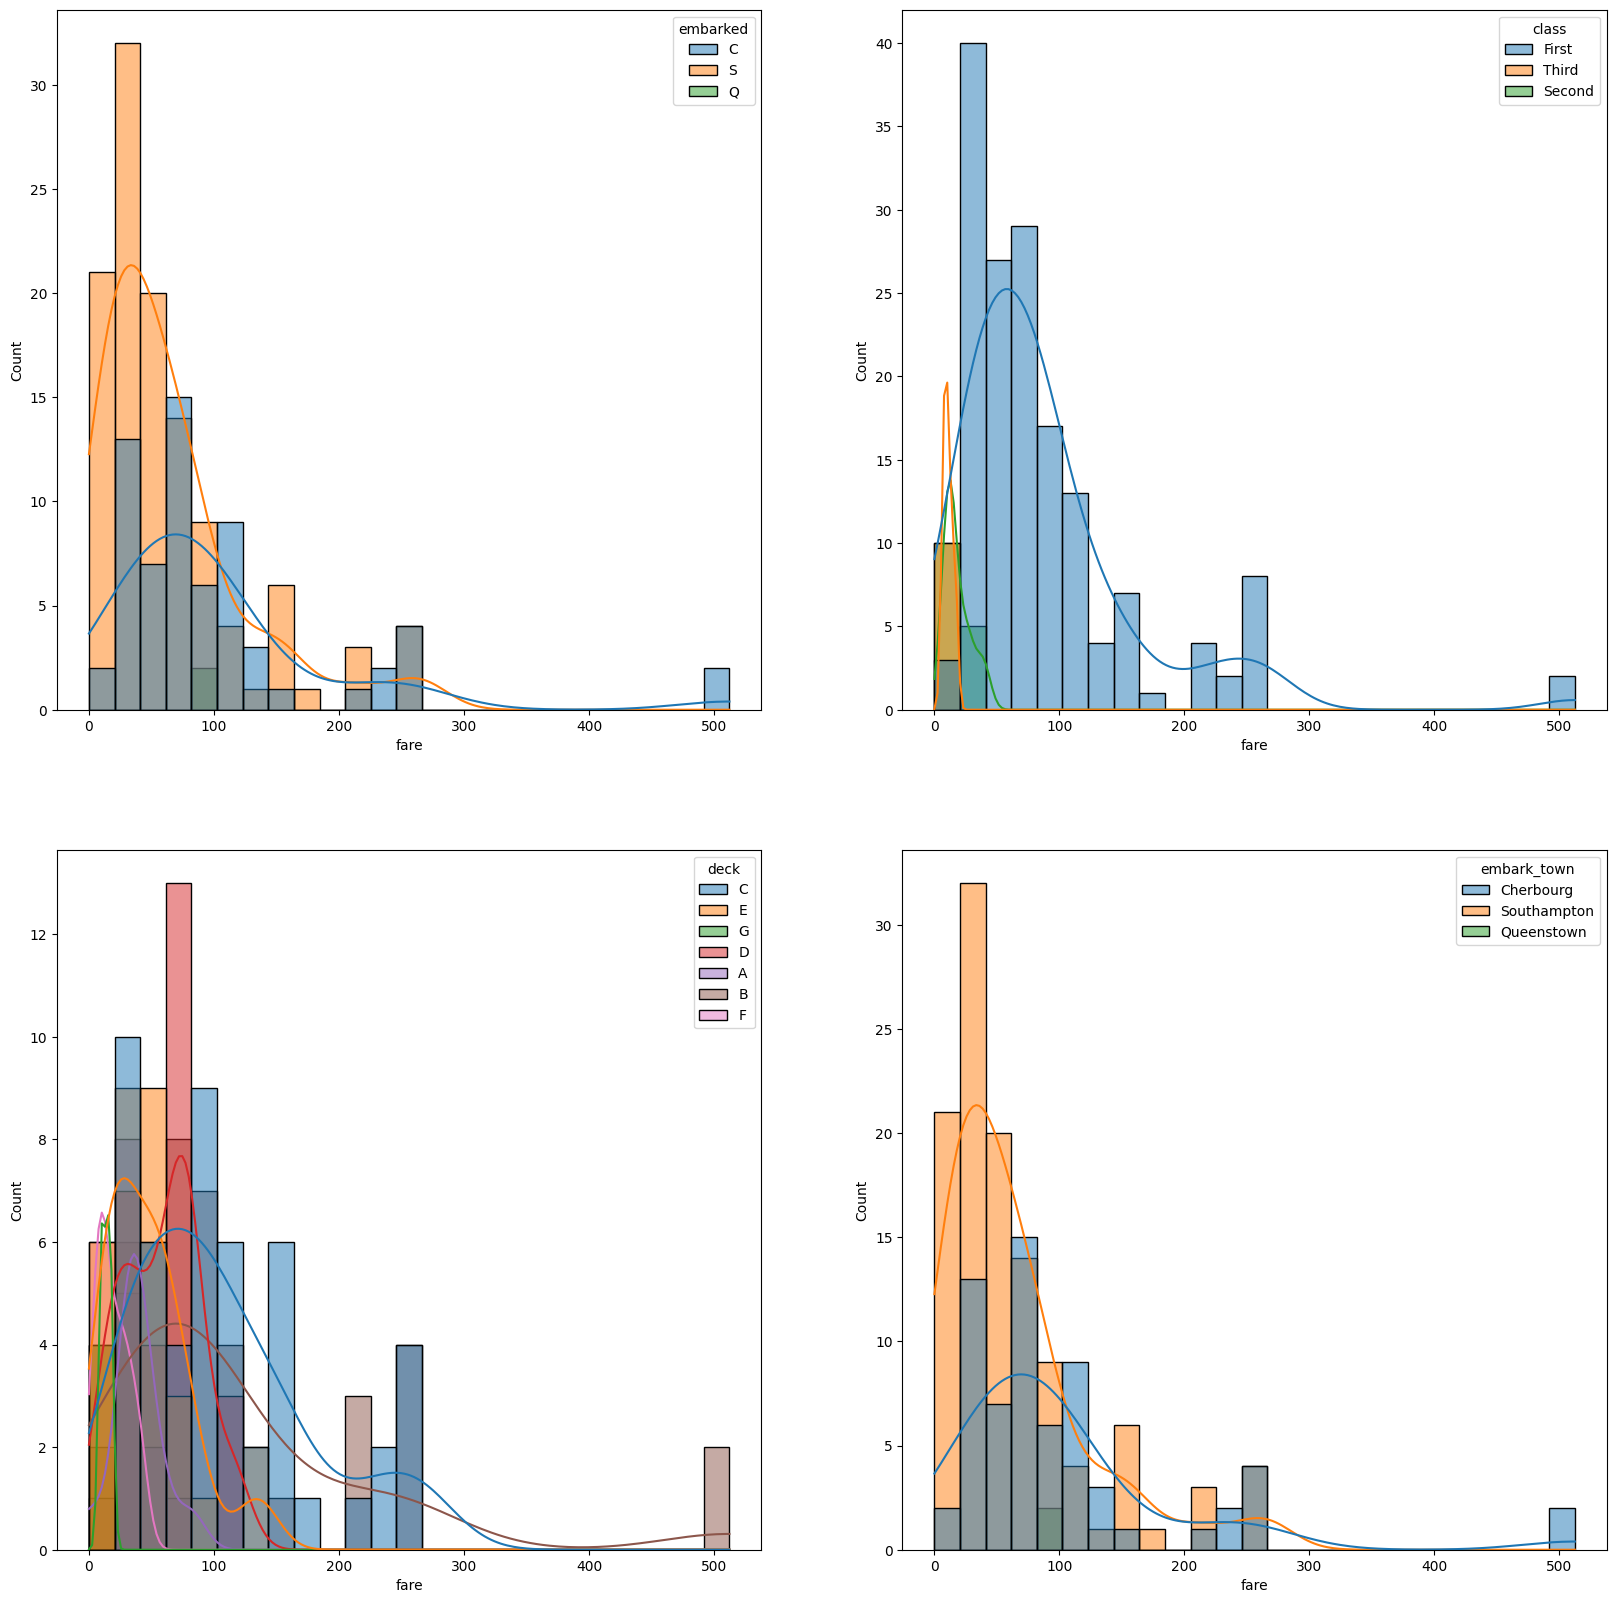

In [259]:
features_categoricas = tools_ML.plot_features_cat_regression(dataframe=df_titanic_sin_NaN, target_col="fare", columns= [], pvalue=0.05, with_individual_plot=True)
print(features_categoricas)

# TOOLBOX_II

# Función eval_model

In [260]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [261]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [262]:
tools_ML.tipifica_variables(df=df_titanic, umbral_categoria=10, umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,survived,int64,2,0.22,Binaria
1,pclass,int64,3,0.34,Categórica
2,sex,object,2,0.22,Binaria
3,age,float64,88,9.88,Numérica continua
4,sibsp,int64,7,0.79,Categórica
5,parch,int64,7,0.79,Categórica
6,fare,float64,248,27.83,Numérica continua
7,embarked,object,3,0.34,Categórica
8,class,object,3,0.34,Categórica
9,who,object,3,0.34,Categórica


In [263]:
df_titanic.drop(columns=["class","embark_town", "alive", "deck"],inplace=True) # eliminamos duplicadas


In [264]:
target = "survived"

In [265]:
df_titanic[target].value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [266]:
X = df_titanic[['pclass', 'sex', 'age', 'parch', 'fare', 'embarked']]  
y = df_titanic['survived']  

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [268]:
columnas_categoricas = ["pclass", "sex", "sibsp", "parch", "embarked", "who", "adult_male", "alone"]
features_cat = columnas_categoricas
features_cat

['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'adult_male', 'alone']

In [269]:
columnas_numericas = ["age", "fare"]
features_num = ["fare"]
features_num

['fare']

In [270]:
#Creamos una copia del DataFrame de train
train_set_transformado = train_set.copy()

#Aplicamos las transformaciones
train_set_transformado["sex"] = train_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
train_set_transformado["adult_male"] = train_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
train_set_transformado["alone"] = train_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

train_set_transformado = pd.get_dummies(train_set_transformado, columns=["embarked"], dtype= int)
train_set_transformado = pd.get_dummies(train_set_transformado, columns=["who"], dtype= int)


In [271]:
#Creamos una copia del DataFrame de test
test_set_transformado = test_set.copy()

#Aplicamos las transformaciones
test_set_transformado["sex"] = test_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
test_set_transformado["adult_male"] = test_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
test_set_transformado["alone"] = test_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

test_set_transformado = pd.get_dummies(test_set_transformado, columns=["embarked"], dtype= int)
test_set_transformado = pd.get_dummies(test_set_transformado, columns=["who"], dtype= int)

In [272]:
scaler = StandardScaler()

scaler.fit(train_set_transformado[features_num]) #Hacemos el fit solo con los datos de train

train_set_transformado[features_num] = scaler.transform(train_set_transformado[features_num])
test_set_transformado[features_num] = scaler.transform(test_set_transformado[features_num])

In [273]:
X_train = train_set_transformado.drop(columns=["age", target])
y_train = train_set_transformado[target]

X_test = test_set_transformado.drop(columns=["age", target])
y_test = test_set_transformado[target]

In [289]:
model = LogisticRegression(random_state=42)


In [290]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [291]:
predicciones = model.predict(X_test)

In [285]:
accuracy = accuracy_score(y_test, predicciones)
print("Exactitud del modelo en el conjunto de prueba:", accuracy)

Exactitud del modelo en el conjunto de prueba: 0.8044692737430168


In [292]:
metricas_para_evaluar = ['ACCURACY', 'PRECISION', 'RECALL', 'MATRIX']

resultados = tools_ML.eval_model(y_test, predicciones, 'clasificacion', metricas_para_evaluar)

NameError: name 'accuracy_score' is not defined

# Función get_features_num_classification

In [ ]:
features_numericas = tools_ML.get_features_num_classification(df_wines, target_col="quality", umbral_discreta=7, umbral_pvalue=0.05)
print(features_numericas)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


# Función plot_features_num_classification

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


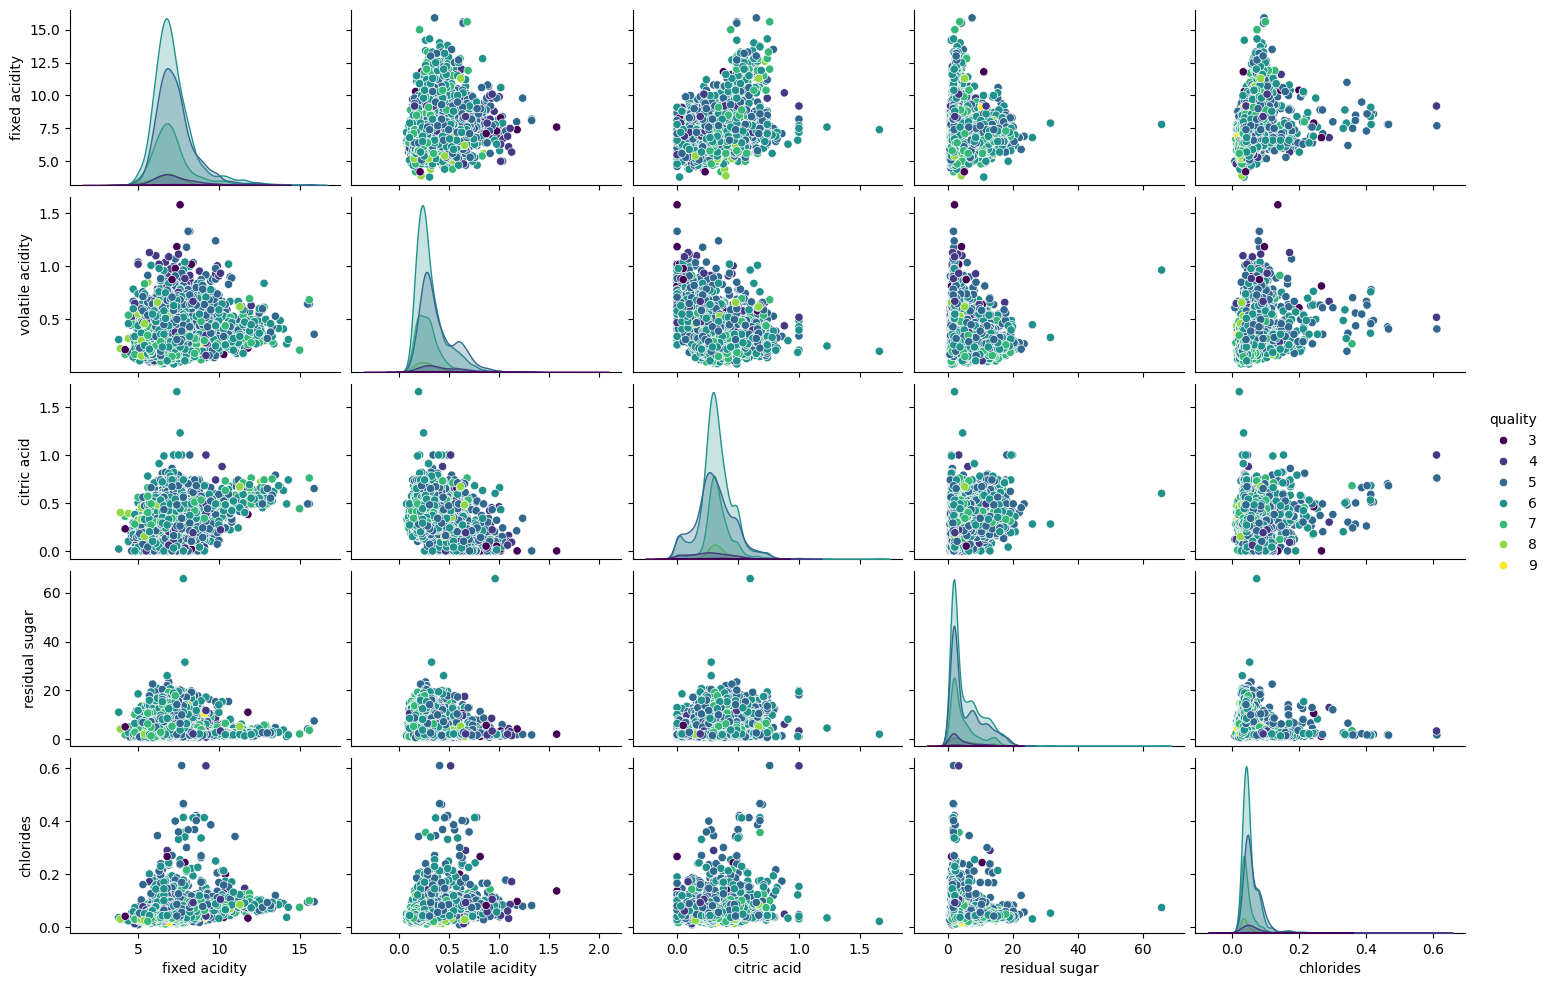

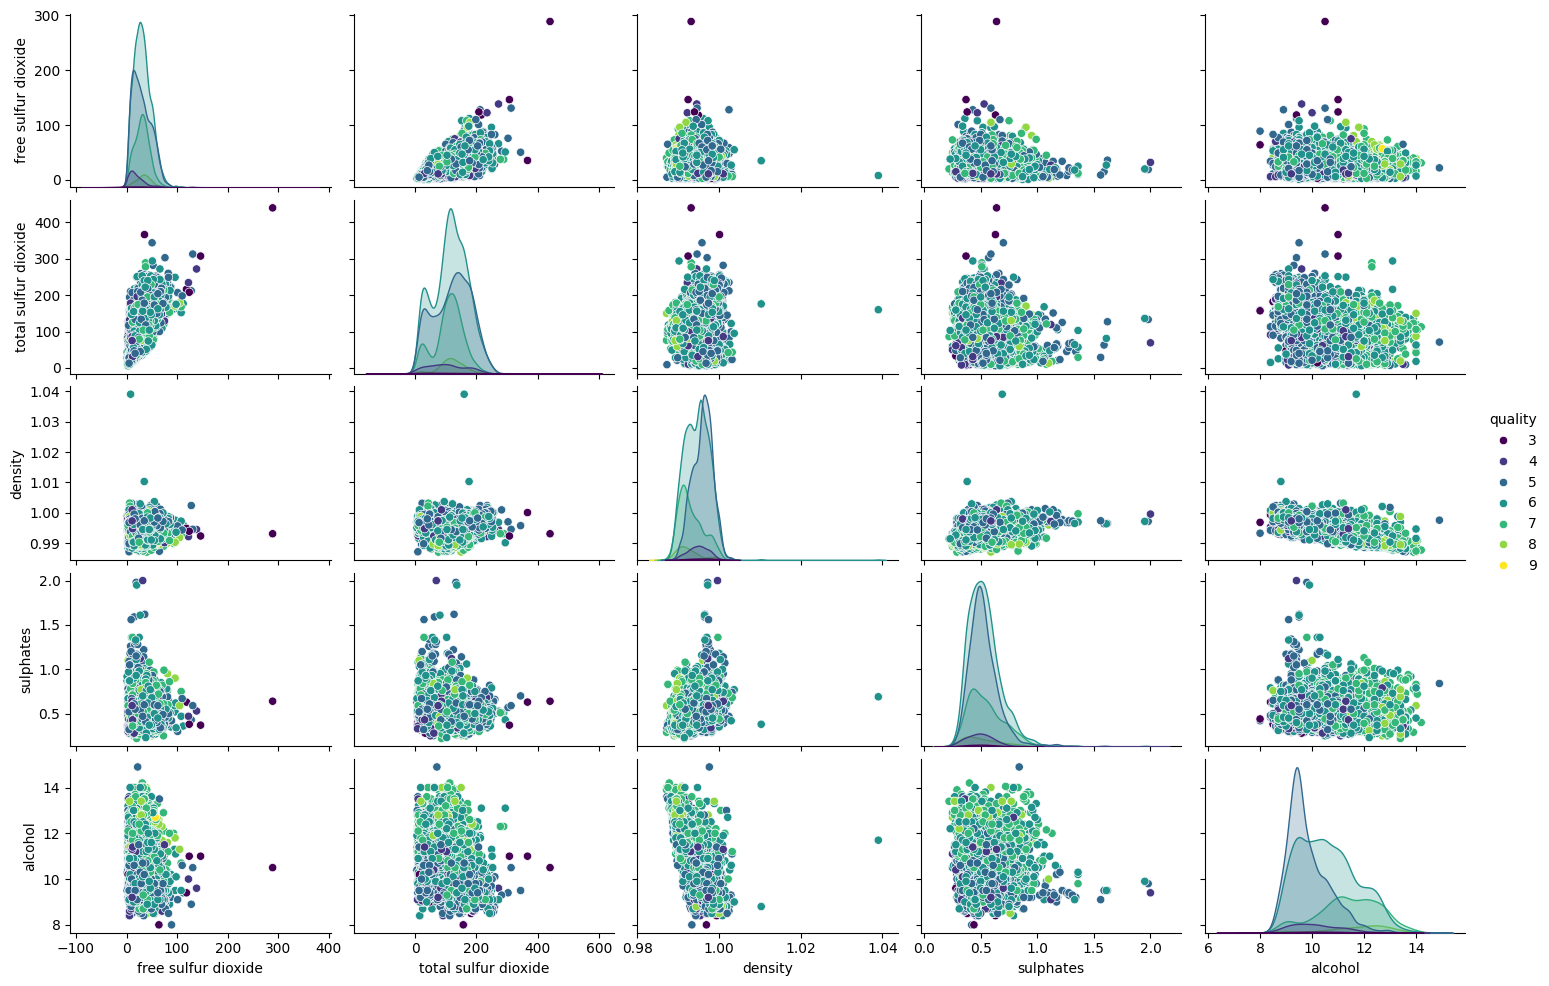

In [ ]:
features_numericas = tools_ML.plot_features_num_classification(df=df_wines, target_col="quality", umbral_discreta=7, lista_columnas=[], umbral_pvalue=0.05, limite_pairplot=5)
print(features_numericas)

# Función get_features_cat_classification

In [ ]:
selected_features = tools_ML.get_features_cat_classification(df=df_titanic_sin_NaN, target_col="alive", normalize=True, mi_threshold=0.1)
print("Selected features:", selected_features)

Selected features: ['survived', 'age', 'fare', 'who']


# Función plot_features_cat_classification